In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [10]:
# Directorio de datos
DATA_DIR = "/home/guillermo/Documents/SINC/RNA/sincfold/pruebas/crossFamily/data"

def load_data(data_dir):
    """Carga todos los archivos CSV del directorio y elimina columnas 'Unnamed'."""
    data_dict = {}
    for file in os.listdir(data_dir):
        if file.endswith('.csv'):
            name = file.replace('.csv', '')
            # Cargar el DataFrame
            df = pd.read_csv(os.path.join(data_dir, file))
            # Eliminar columnas que contengan 'Unnamed'
            unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
            if unnamed_cols:
                df = df.drop(columns=unnamed_cols)
            data_dict[name] = df
    return data_dict

def basic_statistics(data_dict):
    """Genera estadísticas básicas para cada dataset."""
    stats = {}
    for name, df in data_dict.items():
        print(f"\n=== Estadísticas básicas para {name} ===")
        print(f"Dimensiones del dataset: {df.shape}")
        print("\nPrimeras 5 filas:")
        print(df.head())
        print("\nEstadísticas descriptivas:")
        print(df.describe())
        print("\nTipos de datos:")
        print(df.dtypes)
        print("\nValores nulos:")
        print(df.isnull().sum())

def plot_distributions(data_dict):
    """Genera gráficos de distribución para variables numéricas."""
    for name, df in data_dict.items():
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        
        if len(numeric_cols) > 0:
            plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))
            for i, col in enumerate(numeric_cols, 1):
                plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
                sns.histplot(data=df, x=col, kde=True)
                plt.title(f'Distribución de {col} en {name}')
            plt.tight_layout()
            plt.show()

def plot_correlations(data_dict):
    """Genera matrices de correlación para variables numéricas."""
    for name, df in data_dict.items():
        numeric_df = df.select_dtypes(include=['float64', 'int64'])
        if not numeric_df.empty:
            plt.figure(figsize=(10, 8))
            sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
            plt.title(f'Matriz de correlación para {name}')
            plt.show()

def analyze_categorical(data_dict):
    """Analiza variables categóricas."""
    for name, df in data_dict.items():
        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            print(f"\n=== Análisis de {col} en {name} ===")
            print("\nConteo de valores únicos:")
            print(df[col].value_counts())
            print("\nPorcentaje de valores únicos:")
            print(df[col].value_counts(normalize=True) * 100)


In [24]:
data_dict = load_data(DATA_DIR)
print(data_dict.keys())
data_dict['test_telomerase']

dict_keys(['train_telomerase', 'train_tRNA', 'test_tRNA', 'test_RNaseP', 'test_telomerase', 'train_RNaseP'])


,id,sequence,structure,base_pairs,len
0,telomerase_AF221906.96-545,GGGUUGCGGAGGGAGGGCCCGGGAGGGGUGAGCGUCCAUUAUCGUC...,.................((((((.(((((((..(((.............,"[[18, 208], [19, 207], [20, 206], [21, 205], [...",450
1,telomerase_AF221920.99-541,GGGUUGCGGAGGGUGGGCCCAGGAGCGGUGGCGGCCAUUUUUUAAG...,.................(((.((((((((((.(((((............,"[[18, 210], [19, 209], [20, 208], [22, 206], [...",443
2,telomerase_AF221910.112-554,UGUCAUUCCGGAGAGGGGCGUUUUCUUCUUUCUCUAACCCUAAUGU...,...(((((.((((((((((((((((........................,"[[4, 175], [5, 174], [6, 173], [7, 172], [8, 1...",443
3,telomerase_AF221936.98-540,GGGUUGCGGAGGGUGGGCCCCGGGUUGGUGGCAGCCAUUUCUCAUC...,.................(((.(((..(((((.(((((............,"[[18, 208], [19, 207], [20, 206], [22, 204], [...",443
4,telomerase_AF221923.106-554,GGGUUGAGGAUGGCGCCCCCGGGUCGGGCAGUGGUCUUUUUUGUUC...,.................((((((..(((..(.((((.............,"[[18, 208], [19, 207], [20, 206], [21, 205], [...",449
5,telomerase_AF221913.109-520,UUAAUUAGAGGGAUUGGAAGGUUCCGCUUAUGCUAACCCUAAUAUU...,..(((.((.(((...((((((((((........................,"[[3, 172], [4, 171], [5, 170], [7, 168], [8, 1...",412
6,telomerase_U85256.1-451,GGGUUGCGGAGGGUGGGCCUGGGAGGGGUGGUGGCCAUUUUUUGUC...,.................((((((((((((((.(((((............,"[[18, 208], [19, 207], [20, 206], [21, 205], [...",451
7,telomerase_AF221924.105-538,CGCGUGGCGGAUGGGGAGGCUCCAGUCUCACUAACCCUAAUGGCUG...,...((((.((.(((((((((((...................(((.....,"[[4, 173], [5, 172], [6, 171], [7, 166], [9, 1...",434
8,telomerase_AF221908.136-584,AAUCAGCGUUUAAAGCUCAAUGUGGACGGAGGUCUCUGUUUCGCUA...,....................(((((((((((((((((............,"[[21, 182], [22, 181], [23, 180], [24, 179], [...",449
9,telomerase_AF221931.99-541,GGGUUGCGGAGGGUGGGCUCGGGAGGGGUGGCGGUCAUUUUCUGUC...,.................((((((((((((((.(((((............,"[[18, 208], [19, 207], [20, 206], [21, 205], [...",443


In [26]:
for key, df in data_dict.items():
    print(key)
    print(df.len.mean())
    

train_telomerase
191.68085662052755
train_tRNA
213.59086785606289
test_tRNA
77.10233393177738
test_RNaseP
332.1563876651982
test_telomerase
438.42857142857144
train_RNaseP
175.5108504398827


In [15]:
# Realizar análisis
basic_statistics(data_dict)


=== Estadísticas básicas para train_telomerase ===
Dimensiones del dataset: (3829, 5)

Primeras 5 filas:
                                                  id  \
0                        5s_Acholeplasma-laidlawii-1   
1                          5s_Acidovorax-temperans-1   
2                   tmRNA_Stre.gord._TRW-29390_1-349   
3  tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...   
4                              srp_List.mono._U15684   

                                            sequence  \
0  UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...   
1  UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...   
2  GGGGUCGUUACGGAUUCGACAGGCAUUAUGAGGCAUAUUUUGCGAC...   
3  UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...   
4  UGGGUUGAUGAGCGUGAAGCCUUCGCUCGGUUGGAUUUUUCUUCAU...   

                                           structure  \
0  ((((((((......((((((((....((((((.............)...   
1  .(((((((((.....((((((((.....((((((...............   
2  (((((((............((((((((....(((((((((..((((...

In [16]:
analyze_categorical(data_dict)


=== Análisis de id en train_telomerase ===

Conteo de valores únicos:
id
5s_Acholeplasma-laidlawii-1                          1
srp_Sacc.kluy._SKAA0027M04.b1                        1
tmRNA_Alka.meta._TRW-293826_1-355                    1
srp_Wolb.endo._AB080664                              1
5s_Streptomyces-sp.-4                                1
                                                    ..
tRNA_tdbR00000109-Haloferax_volcanii-2246-Gly-NCC    1
5s_Platymonas-subcordiformis-1                       1
16s_A.fulgidus_domain4                               1
srp_Lyco.escu._Z29100                                1
5s_Streptomyces-violaceus-1                          1
Name: count, Length: 3829, dtype: int64

Porcentaje de valores únicos:
id
5s_Acholeplasma-laidlawii-1                          0.026116
srp_Sacc.kluy._SKAA0027M04.b1                        0.026116
tmRNA_Alka.meta._TRW-293826_1-355                    0.026116
srp_Wolb.endo._AB080664                              0.026116

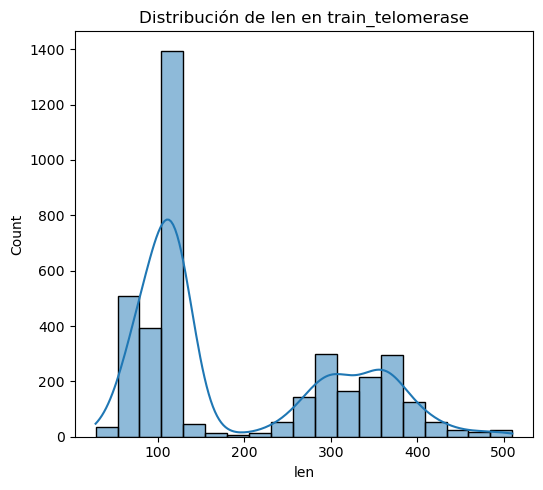

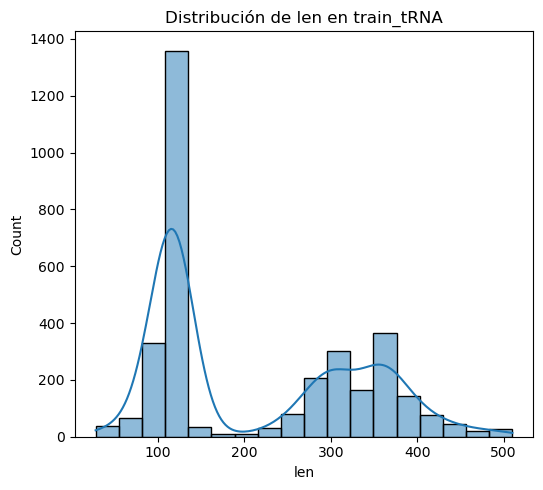

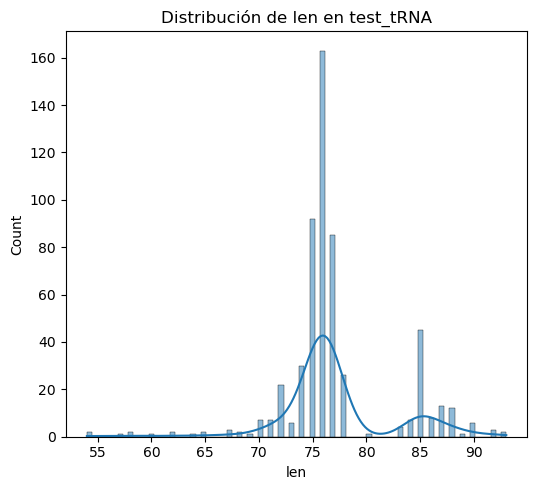

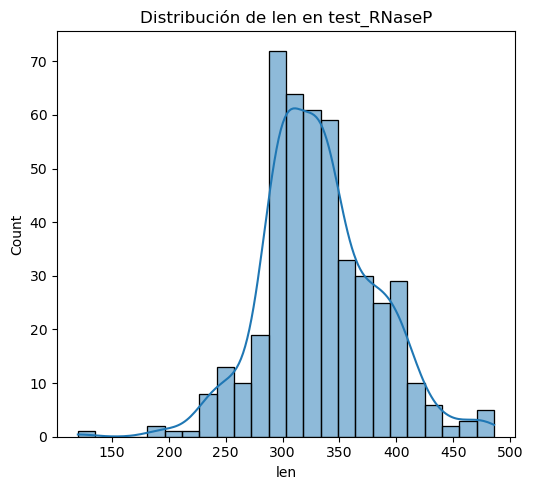

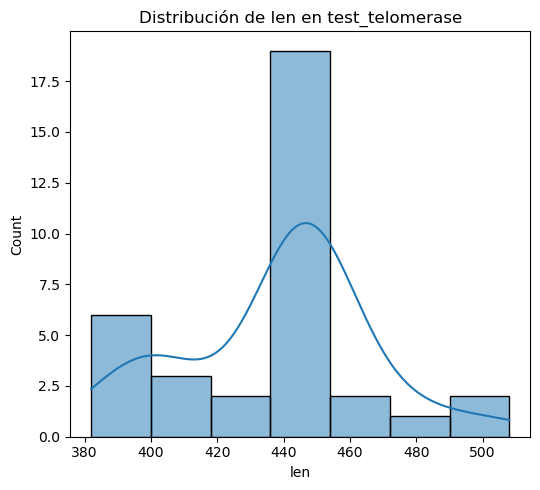

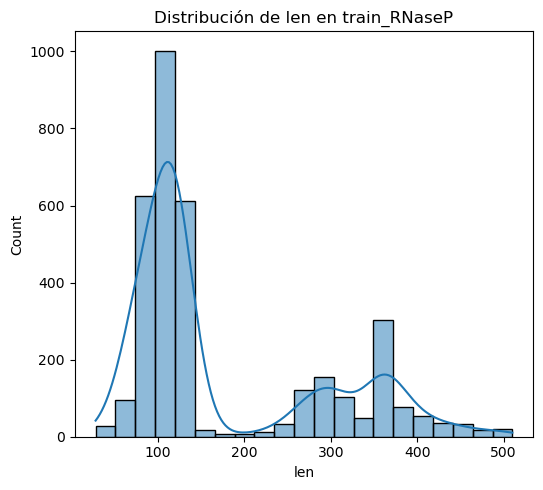

In [17]:
plot_distributions(data_dict)